In [1]:
import pyext.src.ais as ais
#from pyext.src.ais import key, n_samples, n_inter, betas, x
import jax
import jax.random as jrandom
import jax.numpy as jnp
import jax.scipy as jsp


from jax import grad, vmap
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from functools import partial

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10,10)

In [2]:
n_samples = 10000
n_inter = 50
n_mh_steps = 10
mu = 99
sig = 7
do_ais__unorm2unorm__j = ais.do_ais__unorm2unorm__p(mu = mu, sig = sig, n_inter = n_inter,
                                                   n_samples = n_samples, n_mh_steps = n_mh_steps)

In [3]:
jdo_ais__unorm2unorm = jax.jit(do_ais__unorm2unorm__j)

In [4]:
key = jax.random.PRNGKey(10)
weights, samples = jdo_ais__unorm2unorm(key)

TypeError: unsupported operand type(s) for ** or pow(): 'function' and 'DynamicJaxprTracer'

ValueError: Illegal format string "22"; two marker symbols

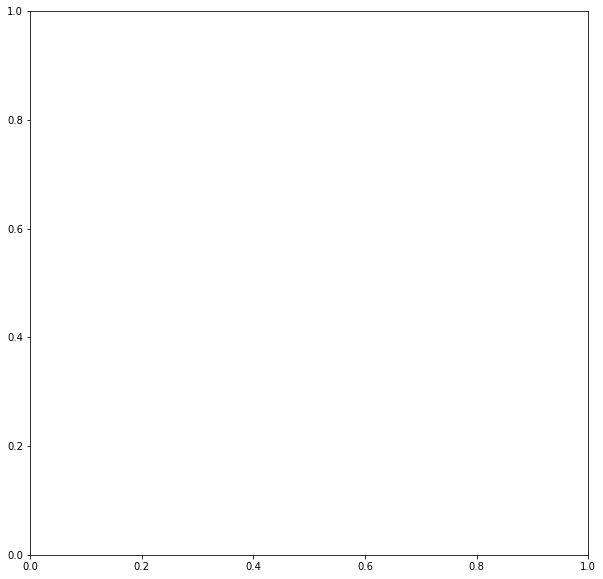

In [91]:
mu, sigma, f_n, x0, n_inter, n_samples, betas, key = ais.ais_prelude()
y = []
x = jnp.arange(-10, 10, 0.1)
f_n_notebook = jax.scipy.stats.norm.pdf

mu_notebook = 90
sig_notebook = 5
x_notebook = jnp.arange(-200, 200, 1)
for i in x:
    ys = f_n(i, loc=0, scale=1)
    y.append(ys)


def grad_plot(x, f_n):
    plt.plot(x, vmap(f_n)(x), 'k--',
             x, vmap(grad(f_n))(x), '22',
             x, vmap(grad(grad(f_n)))(x), '-',
             x, vmap(grad(grad(grad(f_n))))(x), 'g-')

    plt.show()

grad_plot(x, f_n)

ValueError: '19' is not a valid value for color

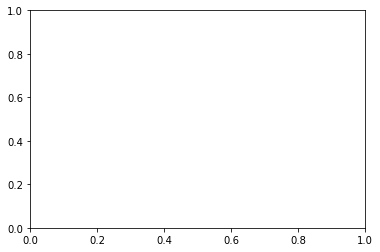

In [89]:
plt.plot(x, vmap(f_n)(x), color='19')

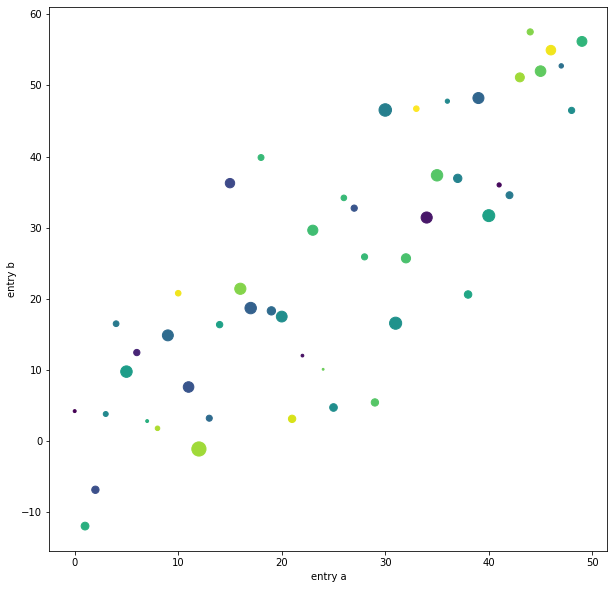

In [94]:
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

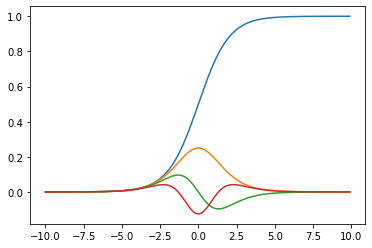

In [58]:
grad_plot(x, jsp.stats.logistic.cdf)

In [56]:
jsp.stats.logistic.

TypeError: 'module' object is not callable

In [5]:
samples, weights = ais.ais_example(mu_notebook, sig_notebook, n_samples=100, n_gibbs_steps=10)

UnboundLocalError: local variable 'f_0' referenced before assignment

In [6]:
def get_ais_mean(ais_samples, ais_weights):
    return 1/np.sum(ais_weights) * np.sum(ais_samples * ais_weights)
    
    

In [7]:
get_ais_mean(samples, weights)

NameError: name 'samples' is not defined

In [8]:

f_n = jax.scipy.stats.norm.pdf
p_f0 = partial(ais.f_0, mu=mu_notebook, sig=sig_notebook)
p_fj = partial(ais.f_j, f_0=p_f0, f_n=f_n)

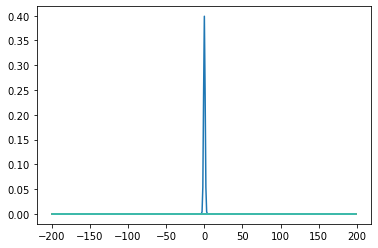

In [9]:
for i in np.arange(0, 1, 0.1):
    plt.plot(x_notebook, p_fj(x_notebook, i))

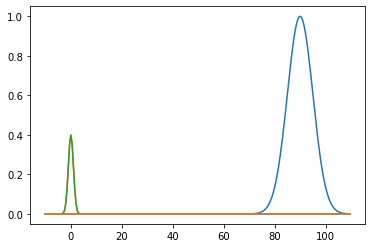

In [10]:
#x = np.arange(mu_notebook - 4*sig_notebook, sig_notebook * 4 + mu_notebook, 1/4 * sig_notebook)
xmin = -10
xmax=mu_notebook + 4*sig_notebook
x = np.arange(xmin, xmax, 0.5)
plt.plot(x, p_f0(x))
plt.plot(x, f_n(x))
for i in np.arange(0, 1, 0.1):
    plt.plot(x, p_fj(x, i))
    
plt.show()

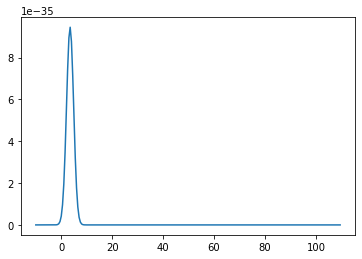

In [11]:
plt.plot(x, p_fj(x, 0.5))

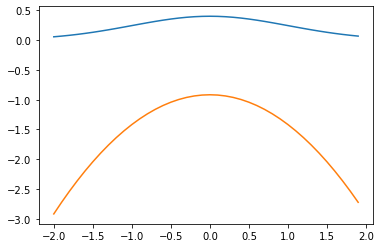

In [12]:
x = np.arange(-2, 2, 0.1)
plt.plot(x, jax.scipy.stats.norm.pdf(x))
plt.plot(x, jax.scipy.stats.norm.logpdf(x))

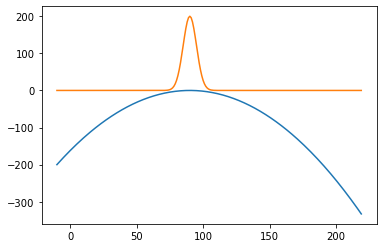

In [23]:
x = np.arange(xmin, 2*xmax, 1)
plt.plot(x, ais.log_f0(x, mu=mu_notebook, sig=sig_notebook), scaley=False)
plt.plot(x, 200*ais.f_0(x, mu=mu_notebook, sig=sig_notebook))

In [ ]:
p_log_f0 = partial(ais.log_f0(mu=mu_notebook, sig=sig_notebook))
p_log_fn = 
for beta in np.arange(0, 1, 0.1):
    plt.plot(x, 200*ais.f_j(x, beta mu=mu_notebook, sig=sig_notebook))
    plt.plot(x, ais.log_fj(x, beta, log_))

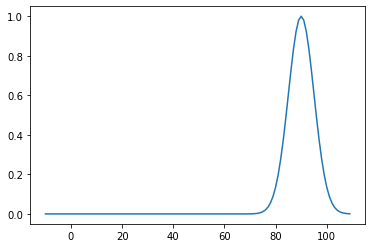

In [15]:
plt.plot(x, ais.f_0(x, mu=mu_notebook, sig=sig_notebook))

In [16]:
?plt.plot

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., 98.]),
 array([-5.02294384e+08, -4.52064946e+08, -4.01835508e+08, -3.51606070e+08,
        -3.01376631e+08, -2.51147193e+08, -2.00917755e+08, -1.50688317e+08,
        -1.00458879e+08, -5.02294405e+07, -2.30183867e+00]),
 <BarContainer object of 10 artists>)

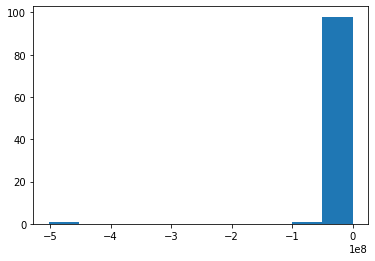

In [16]:
plt.hist(weights * samples)

In [27]:
a = 1/np.sum(weights) * np.sum(weights * samples)

In [28]:
a

0.5593798593436217

In [26]:
1/len(weights) * np.sum(weights)

20.450479738105958

In [14]:
ais.f_j

<function pyext.src.ais.f_j(x, beta)>

In [2]:
jdo_ais = jax.jit(ais.do_ais)

In [7]:
okey = key
samples, weights = ais.do_ais(okey, n_samples, n_inter, betas, x)

In [6]:
#target N(5, 2)
#proposal N(0, 1)
import numpy as np
a = 1/jnp.sum(weights) *(jnp.sum(weights * samples))

In [10]:
samples, weights

(DeviceArray([ -8.759453  ,   7.499897  ,  12.0804    ,  -4.628505  ,
                5.286942  ,  10.669766  ,   9.747906  ,   8.902935  ,
                5.5352697 ,  -0.7860356 ,  -1.8937062 ,  -0.9373089 ,
               -5.3776193 , -13.655067  ,   4.7546515 ,   7.01027   ,
                8.339084  , -12.465981  ,  -2.9416249 ,  -2.2929218 ,
               -0.7732041 ,   9.837725  ,   5.7311816 ,  -1.5261312 ,
               -5.17635   ,  -1.9133081 ,  -1.0057569 ,  -0.06322229,
                5.732791  ,   7.915844  ,   5.239588  ,  16.184364  ,
               14.513094  ,  -0.69070286,   7.224042  ,  -8.522067  ,
               -0.60364723,   5.2669206 ,   6.809432  ,   0.18702906,
               10.021658  ,   8.803823  ,   5.187592  ,   4.7117786 ,
               -1.6639252 ,  -0.94339186,   7.453226  ,  -0.62132084,
                9.207269  ,   5.1112685 ,  -6.7543283 ,  -1.6793603 ,
                5.273603  ,   5.602741  ,   5.125672  ,  -1.1155878 ,
                6.42